In [5]:
import plotly.express as px
import pandas as pd
import json
from pathlib import Path
import numpy as np
import sys
sys.path.append(str(Path("..").resolve()))
sys.path.append(str(Path("../..").resolve()))
from llm.llama.main import compute_metrics_from_files, aggr_finetune

In [13]:
path_data = Path("../../data/debug_llama_class/")
aggr_finetune(
    folder_out=path_data,
    folder_in=path_data,
    pattern_name="in"
)

In [14]:

df = pd.read_json(path_data / "metrics.json")
df["accuracy"] = df["conf_matrix"].apply(lambda x:np.sum(np.diag(x))/np.sum(x))
df["f1_non_severe"] = df["f1"].apply(lambda x:x[0])
df["f1_severe"] = df["f1"].apply(lambda x:x[1])
df.sort_values(by="epoch",inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   path_data_json            8 non-null      object 
 1   path_data_folder          8 non-null      object 
 2   data_folder_path_to_save  8 non-null      object 
 3   algorithm                 8 non-null      object 
 4   token                     8 non-null      object 
 5   interval_idx              0 non-null      float64
 6   n_chunks                  0 non-null      float64
 7   seed_start                8 non-null      int64  
 8   seed_end                  8 non-null      int64  
 9   pred_field                8 non-null      object 
 10  input_field               8 non-null      object 
 11  n_tokens_infered_max      8 non-null      int64  
 12  n_tokens_show_min         8 non-null      int64  
 13  n_tokens_show_max         8 non-null      int64  
 14  n_data        

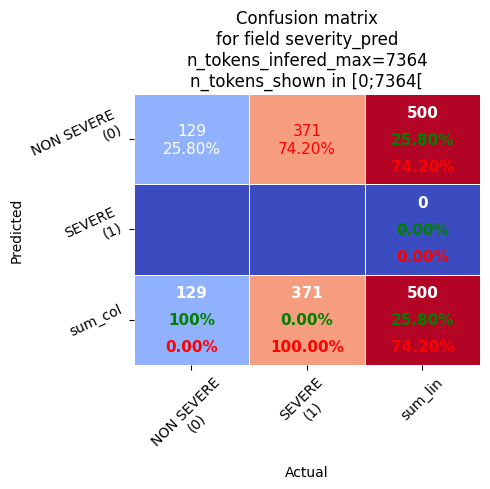

In [ ]:
i = 0
conf_matrix = np.array(df["conf_matrix"].iloc[i])
f1 = df['f1'].iloc[i]
compute_metrics_from_files(
    conf_matrix=conf_matrix,
    f1=f1,
    folder_out=path_data,
    backend=None
)

In [18]:
Lloss = []
for i,row in df.iterrows():
    Lloss.extend([{"loss":e['loss'], "dataset":"tr", "tot_step": e['tot_step']} for e in row.Ltr])
    Lloss.extend([{"loss":e['loss'], "dataset":"val", "tot_step": e['tot_step']} for e in row.Lval])
    
df_loss = pd.DataFrame(Lloss)
display(df_loss)
px.line(df_loss,x="tot_step",y="loss",color="dataset").show()

,loss,dataset,tot_step
0,1.250977,tr,0
1,NaN,tr,1
2,NaN,tr,2
3,NaN,tr,3
4,NaN,tr,4
...,...,...,...
35995,NaN,val,3995
35996,NaN,val,3996
35997,NaN,val,3997
35998,NaN,val,3998
